In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device: {device}')

data_folder = Path("../data")
dataset_location = data_folder / "creditcard.csv"

# Necessary for notebook to see src
import sys
sys.path.append('..')

from src import tsne_visualization, pca_visualization

Device: cuda


In [2]:
original_dataset = pd.read_csv(dataset_location)
dataset = original_dataset.copy(deep=True)

In [3]:
# No Null values

dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Feature extract hour

dataset.iloc[-10:, :]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
dataset[['Time', 'Class']].corr()

,Time,Class
Time,1.000000,-0.012323
Class,-0.012323,1.000000


# Imbalance

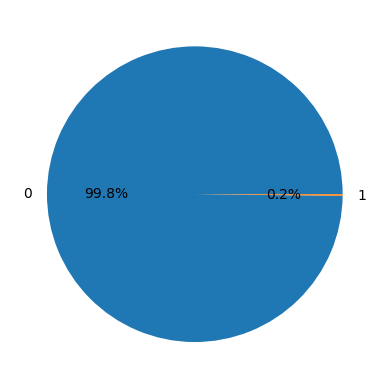

In [5]:
class_value_counts = dataset.Class.value_counts()
plt.pie(class_value_counts, labels=class_value_counts.index,  autopct='%1.1f%%')
plt.show()

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42, shuffle=True)

# CTGAN

In [6]:
# First iteration

from ctgan import CTGAN

ctgan = CTGAN(verbose=True)

ctgan.fit(train_set, discrete_columns=['Class'])

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/300 [00:00<?, ?it/s]/home/tsmn/anaconda3/envs/gan_prj/lib/python3.10/site-packages/torch/autograd/graph.py:769: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115564/work/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-0.12) | Discrim. (0.18): 100%|██████████| 300/300 [45:30<00:00,  9.10s/it] 


In [ ]:
# Save the model

model_folder = Path('..') / 'models' / 'creditcard' / 'CTGAN'
model_file = model_folder / 'base_model.pth'

torch.save(ctgan, model_file)

In [11]:
# Load the model
from ctgan import CTGAN

model_folder = Path('..') / 'models' / 'creditcard' / 'CTGAN'
model_file = model_folder / 'base_model.pth'

base_model: CTGAN = torch.load(model_file)

In [17]:
synhtetic_data = base_model.sample(len(train_set))

synhtetic_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,88360.725561,-1.388247,1.381186,-1.320290,2.190712,-0.610899,-0.804529,-1.585321,0.327264,-0.837353,...,0.182732,0.037645,-0.041312,0.011913,0.069387,0.032944,0.100706,0.040488,92.867065,0.535443
std,46131.821319,3.950512,2.831500,2.410882,3.352080,2.116773,1.794026,3.723403,2.295832,1.882810,...,1.227545,0.811320,0.622485,0.563988,0.606472,0.465479,0.819173,0.361018,189.639491,0.498743
min,-11292.260976,-19.348369,-9.284775,-8.724900,-6.506709,-8.685171,-8.774242,-16.301545,-11.585256,-9.148126,...,-11.437759,-8.059524,-6.406285,-2.121663,-4.484478,-2.022019,-5.202575,-2.352596,-63.240112,0.000000
25%,55247.228042,-2.036868,-0.201534,-2.492882,-0.175476,-1.145034,-1.292974,-1.649333,-0.227480,-1.580737,...,-0.187220,-0.443020,-0.249534,-0.347409,-0.286857,-0.294803,-0.082479,-0.042342,5.322740,0.000000
50%,79161.099855,-0.512111,0.652897,-0.730757,1.167288,-0.389919,-0.616711,-0.310189,0.062714,-0.438146,...,0.066743,0.061422,-0.055221,0.027290,0.096160,0.003576,0.017105,0.032007,24.684138,1.000000
75%,131573.296387,1.137200,2.092010,0.468428,3.830422,0.360792,-0.032318,0.301654,0.585213,0.332954,...,0.389065,0.517996,0.134469,0.434463,0.421857,0.318690,0.307464,0.172567,89.026880,1.000000
max,177420.560579,2.422112,12.013482,3.613801,16.332311,12.913904,6.782382,10.358779,12.645606,8.692318,...,14.591673,7.152566,8.681857,1.891002,3.875992,3.286935,3.537566,1.965445,1723.491876,1.000000


In [16]:
train_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993,0.001729
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000,0.000000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000,0.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Loss GRAPH

<Axes: >

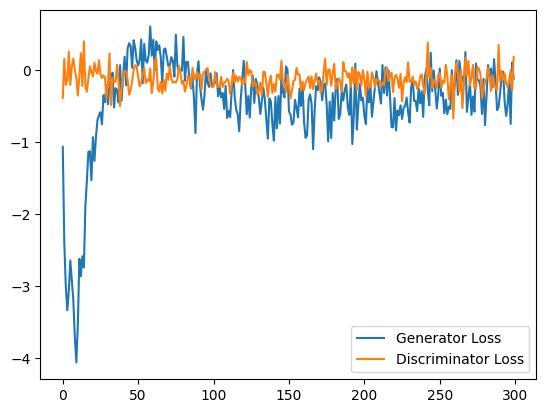

In [13]:
loss_values = base_model.loss_values.copy(deep=True)

loss_values = loss_values[['Generator Loss', 'Discriminator Loss']]
loss_values = loss_values.applymap(lambda x: x.item())

loss_values.plot()

# Quality Metrics

In [14]:
import warnings
import pandas as pd

# Suppress the specific warning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

from sdv.metrics.tabular import KSComplement, ContinuousKLDivergence, GMLogLikelihood

synthetic_data = base_model.sample(len(train_set))

# Tests the distrubitons of each columns
print(f'Mean KS: {KSComplement.compute(train_set, synthetic_data)}')
# Tests the joint probability for every column pair
print(f'CLK: {ContinuousKLDivergence.compute(train_set, synthetic_data)}')
# Tests the likelihood of the synthetic data being from the same distrubition fo the real data
print(f'GMLL: {GMLogLikelihood.compute(train_set, synthetic_data)}')
print()

for col in synthetic_data.columns:
    print(f'KS for the {col} column: {KSComplement.compute(train_set[[col]], synthetic_data[[col]])}')

Mean KS: 0.8299780764937114
CLK: 0.720037188380905
GMLL: -67.59629938627523

KS for the Time column: 0.9252605938247492
KS for the V1 column: 0.8222036911057956
KS for the V2 column: 0.7546182711931356
KS for the V3 column: 0.7608593561412363
KS for the V4 column: 0.6466633018060524
KS for the V5 column: 0.8573372248677829
KS for the V6 column: 0.8154315433737848
KS for the V7 column: 0.7716737255590423
KS for the V8 column: 0.8990980710570783
KS for the V9 column: 0.7878777238912418
KS for the V10 column: 0.6622309025872852
KS for the V11 column: 0.8035945489258047
KS for the V12 column: 0.74386973600474
KS for the V13 column: 0.9738945335644846
KS for the V14 column: 0.7079154688494371
KS for the V15 column: 0.9716122802782593
KS for the V16 column: 0.8113498211503434
KS for the V17 column: 0.8166648379380719
KS for the V18 column: 0.850279795474994
KS for the V19 column: 0.8480545985209242
KS for the V20 column: 0.911079900809761
KS for the V21 column: 0.8363361056858829
KS for the 

# Second TRY

In [52]:
second_model = CTGAN(epochs=10, verbose=True)

second_model.fit(train_set, discrete_columns=['Class'])

Gen. (-4.23) | Discrim. (-0.12): 100%|██████████| 10/10 [01:50<00:00, 11.09s/it]


In [ ]:
# Save the model

model_folder = Path('..') / 'models' / 'creditcard' / 'CTGAN'
model_file = model_folder / '10_epochs.pth'

torch.save(second_model, model_file)

In [18]:
model_folder = Path('..') / 'models' / 'creditcard' / 'CTGAN'
model_file = model_folder / '10_epochs.pth'

second_model: CTGAN = torch.load(model_file)

<Axes: >

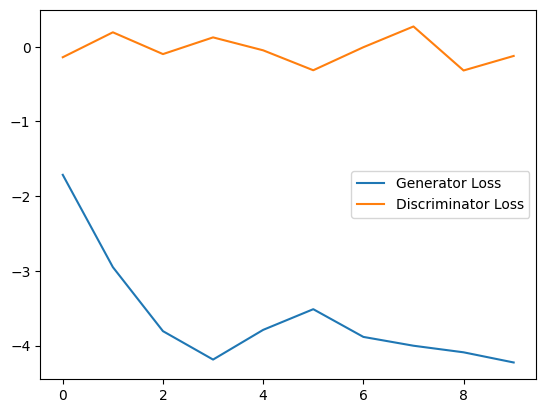

In [17]:
loss_values = second_model.loss_values.copy(deep=True)

loss_values = loss_values[['Generator Loss', 'Discriminator Loss']]
loss_values = loss_values.applymap(lambda x: x.item())

loss_values.plot()

In [ ]:
synhtetic_data = second_model.sample(len(train_set))

# Remove time classes

synhtetic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,227845.0,88693.690865,45634.814331,-9429.826855,52809.980764,78684.894822,133769.096879,180335.898746
V1,227845.0,-2.282662,4.176066,-18.998688,-2.747804,-1.278425,-0.031408,2.421591
V2,227845.0,1.463591,3.160750,-9.488793,-0.394438,0.620059,1.718993,11.857226
V3,227845.0,-0.280163,2.354961,-8.425502,-1.536861,0.347670,1.482991,4.202905
V4,227845.0,1.680211,3.081707,-5.509567,-0.195745,0.890992,2.868563,16.088366
V5,227845.0,-0.675314,1.957007,-8.080572,-1.220083,-0.305000,0.422385,11.182574
V6,227845.0,-0.374077,1.277813,-8.296895,-0.979103,-0.417187,0.213358,7.290423
V7,227845.0,-2.238967,4.075233,-16.256577,-2.093050,-0.835490,0.035612,10.101326
V8,227845.0,-0.070924,1.653263,-11.037961,-0.363569,-0.020491,0.376696,11.567088
V9,227845.0,-0.475955,1.523780,-8.867893,-1.254906,-0.303167,0.357869,9.950658


In [22]:
train_set['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [21]:
synhtetic_data['Class'].value_counts()

1    119170
0    108675
Name: Class, dtype: int64

In [20]:
train_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993,0.001729
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000,0.000000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000,0.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [56]:
synthetic_data = second_model.sample(len(train_set))

# Tests the distrubitons of each columns
print(f'Mean KS: {KSComplement.compute(train_set, synthetic_data)}')
# Tests the joint probability for every column pair
print(f'CLK: {ContinuousKLDivergence.compute(train_set, synthetic_data)}')
# Tests the likelihood of the synthetic data being from the same distrubition fo the real data
print(f'GMLL: {GMLogLikelihood.compute(train_set, synthetic_data)}')
print()

for col in synthetic_data.columns:
    print(f'KS for the {col} column: {KSComplement.compute(train_set[[col]], synthetic_data[[col]])}')

Mean KS: 0.8047712118949002
CLK: 0.7440059293765013
GMLL: -66.36930623733822

KS for the Time column: 0.9060413877855559
KS for the V1 column: 0.6534442274353178
KS for the V2 column: 0.7644670719129233
KS for the V3 column: 0.87498957624701
KS for the V4 column: 0.6867387917224429
KS for the V5 column: 0.8490684456538437
KS for the V6 column: 0.9103293905944831
KS for the V7 column: 0.6474138120213302
KS for the V8 column: 0.8841449230836753
KS for the V9 column: 0.845649454673133
KS for the V10 column: 0.8678663126248107
KS for the V11 column: 0.7841690623011257
KS for the V12 column: 0.6574513375320941
KS for the V13 column: 0.9638131185674472
KS for the V14 column: 0.6446794970264873
KS for the V15 column: 0.8767714893897167
KS for the V16 column: 0.8554455880093923
KS for the V17 column: 0.8747174614321139
KS for the V18 column: 0.8905220654392241
KS for the V19 column: 0.817959577783142
KS for the V20 column: 0.643222366082205
KS for the V21 column: 0.8831003533103645
KS for the 

# Third TRY

In [18]:
third_model = CTGAN(generator_lr=0.00007, discriminator_lr=0.00007, verbose=True)

third_model.fit(train_set, discrete_columns=['Class'])

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/300 [00:00<?, ?it/s]/home/tsmn/anaconda3/envs/gan_prj/lib/python3.10/site-packages/torch/autograd/graph.py:769: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115564/work/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-0.41) | Discrim. (-0.24): 100%|██████████| 300/300 [48:38<00:00,  9.73s/it]


In [19]:
# Save the model

model_folder = Path('..') / 'models' / 'creditcard' / 'CTGAN'
model_file = model_folder / '1e-4_lr.pth'

torch.save(third_model, model_file)

In [24]:
model_folder = Path('..') / 'models' / 'creditcard' / 'CTGAN'
model_file = model_folder / '1e-4_lr.pth'

third_model: CTGAN = torch.load(model_file)

/tmp/ipykernel_9667/510410567.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  third_model: CTGAN = torch.load(model_file)


<Axes: >

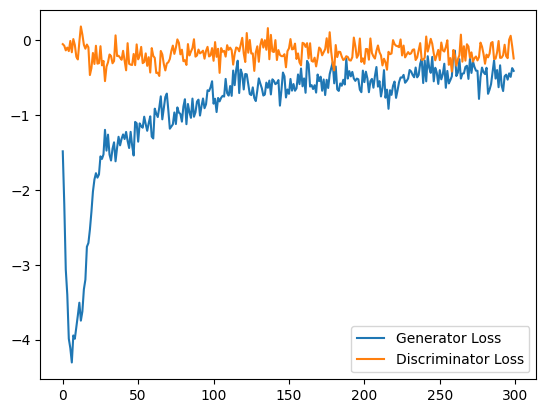

In [21]:
loss_values = third_model.loss_values.copy(deep=True)

loss_values = loss_values[['Generator Loss', 'Discriminator Loss']]
loss_values = loss_values.applymap(lambda x: x.item())

loss_values.plot()

In [22]:
synthetic_data = second_model.sample(len(train_set))

# Tests the distrubitons of each columns
print(f'Mean KS: {KSComplement.compute(train_set, synthetic_data)}')
# Tests the joint probability for every column pair
print(f'CLK: {ContinuousKLDivergence.compute(train_set, synthetic_data)}')
# Tests the likelihood of the synthetic data being from the same distrubition fo the real data
print(f'GMLL: {GMLogLikelihood.compute(train_set, synthetic_data)}')
print()

for col in synthetic_data.columns:
    print(f'KS for the {col} column: {KSComplement.compute(train_set[[col]], synthetic_data[[col]])}')

Mean KS: 0.804234485951471
CLK: 0.7437530817008549
GMLL: -66.21511571428871

KS for the Time column: 0.9031183479997367
KS for the V1 column: 0.6519475959533894
KS for the V2 column: 0.7633698347560841
KS for the V3 column: 0.8761438697360047
KS for the V4 column: 0.6848910443503259
KS for the V5 column: 0.8484144923083675
KS for the V6 column: 0.9090609844411771
KS for the V7 column: 0.6478614847813207
KS for the V8 column: 0.8840088656762273
KS for the V9 column: 0.8439684873488555
KS for the V10 column: 0.8671904145361978
KS for the V11 column: 0.7841910070442625
KS for the V12 column: 0.6561785424301608
KS for the V13 column: 0.9635234479580417
KS for the V14 column: 0.6430731418288749
KS for the V15 column: 0.876503763523448
KS for the V16 column: 0.8559942065878119
KS for the V17 column: 0.8722113717658935
KS for the V18 column: 0.8907151791788277
KS for the V19 column: 0.8181395246768636
KS for the V20 column: 0.6433408676951435
KS for the V21 column: 0.8824639557593978
KS for t

# Sampling

In [59]:
n_samples = len(train_set)

samples_list = []
sample_count = 0

iteration = 0

while True:
    synthteic_data_ones = second_model.sample(n_samples, condition_column='Class', condition_value=1)
    samples_one = synthteic_data_ones[synthteic_data_ones['Class'] == 1].copy(deep=True)
    
    if sample_count + len(samples_one) > n_samples:
        break
    
    samples_list.append(samples_one)
    sample_count += len(samples_one)
    
    iteration += 1
    print(f'Iteration: {iteration:>5} Sample Count: {sample_count:>10}')
    
    del synthteic_data_ones

Iteration:     1 Sample Count:      39032
Iteration:     2 Sample Count:      78007
Iteration:     3 Sample Count:     117004
Iteration:     4 Sample Count:     155818
Iteration:     5 Sample Count:     194657


# Augmentation

In [60]:
synthetic_data = pd.concat(samples_list, axis=0)
augmented_data = pd.concat([train_set, synthetic_data], axis=0)

In [61]:
augmented_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,143352.000000,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.990000,0
165061,117173.000000,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.900000,0
238186,149565.000000,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.990000,0
150562,93670.000000,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.440000,0
138452,82655.000000,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.760000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227799,142798.664291,-0.875959,4.983849,-2.306270,5.285506,-3.059991,0.463363,-0.469186,-0.084785,-0.866056,...,-0.118582,2.805540,-0.044368,0.523338,0.026742,-0.367319,0.766831,-0.097710,7.570960,1
227805,52166.182310,-11.775842,9.850540,-6.392544,14.381871,-0.256440,-1.024137,-11.524482,2.049319,-1.030163,...,-0.616897,-0.033913,-0.009863,-0.086763,0.212838,0.084541,-1.440887,0.643688,205.293959,1
227809,33337.932343,-14.472710,9.263373,0.589870,4.647108,-4.392065,-2.092174,-14.823999,6.417478,-2.984130,...,3.188071,-0.691475,-0.688178,1.221094,1.195136,-0.246863,2.702778,0.121590,8.637215,1
227825,133538.507311,-14.292323,5.518780,0.065488,12.703257,-1.741638,-0.774643,-11.384772,0.874444,-1.739178,...,0.287523,-0.153049,-0.608373,-0.245043,-0.482753,-0.008298,1.011839,-0.156406,21.483048,1


# Prediction

In [62]:
from sklearn.preprocessing import RobustScaler

X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1] 
X_train_augmented, y_train_augmented = augmented_data.iloc[:, :-1], augmented_data.iloc[:, -1] 

train_scaler = RobustScaler()
augmented_scaler = RobustScaler()

X_train = train_scaler.fit_transform(X_train)
X_train_augmented = augmented_scaler.fit_transform(X_train_augmented)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

normal_model = LogisticRegression()
augmented_model = LogisticRegression()

normal_model.fit(X_train, y_train)
augmented_model.fit(X_train_augmented, y_train_augmented)

LogisticRegression()

# Normal Prediction

In [64]:
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1] 

test_scaled = train_scaler.transform(X_test)

print(classification_report(y_test, normal_model.predict(test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



# Augmented Prediction

In [65]:
test_scaled = augmented_scaler.transform(X_test)

print(classification_report(y_test, augmented_model.predict(test_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.89      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [69]:
probabilities = normal_model.predict_proba(test_scaled)[:, 1]
augmented_probabilities = augmented_model.predict_proba(test_scaled)[:, 1]

# ROC

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

auc_score = roc_auc_score(y_test, probabilities)
print("Normal ROC AUC Score:", auc_score)

auc_score = roc_auc_score(y_test, augmented_probabilities)
print("Augmented ROC AUC Score:", auc_score)

Normal ROC AUC Score: 0.9761918519518105
Augmented ROC AUC Score: 0.9436458847748441


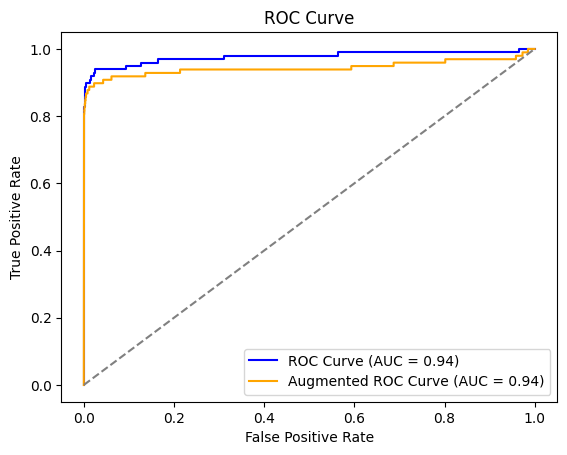

In [79]:
fpr, tpr, _ = roc_curve(y_test, probabilities)
fpr_augmneted, tpr_augmented, _ = roc_curve(y_test, augmented_probabilities)


plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot(fpr_augmneted, tpr_augmented, color='orange', label=f'Augmented ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
# TODO follow a paper and use and try to surprass that